## Students
Please fill in your names and S/U-numbers:
* Linda Schmeitz, S1042449
* Enrico Schmitz, s1047521
* Charlotte Cambier van Nooten, s1044122

# Statistical Machine Learning 2020
# Assignment 3
# Deadline: 2 December 2020
## Instructions
* You can __work in groups__ (= max 3 people). __Write the full name and S/U-number of all team members in the header above.__
* Make sure you __fill in any place that says__ `YOUR CODE HERE` or "YOUR ANSWER HERE" __including comments, derivations, explanations, graphs, etc.__ This means that the elements and/or intermediate steps required to derive the answer have to be in the report. (Answers like 'No' or 'x=27.2' by themselves are not sufficient, even when they are the result of running your code.) If an exercise requires coding, explain briefly what the code does (in comments). All figures should have titles (descriptions), axis labels, and legends (if applicable).
* Please do not add new cells unless necessary, try to write the answers only in the provided cells. Before you turn this problem in, __make sure everything runs as expected__. First, *restart the kernel* (in the menubar, select Kernel$\rightarrow$Restart) and then *run all cells* (in the menubar, select Cell$\rightarrow$Run All). The assignment was written in (and we strongly recommend using) Python 3 by using the corresponding Python 3 kernel for Jupyter.
* The assignment includes certain cells that contain tests. Most of the tests are marked as *hidden* and are used for automatic grading. NB: These hidden tests do not provide any feedback! There are also a couple of tests / checks that are visible, which are meant to help you avoid basic coding errors.
* __Upload the exercises to Brightspace as a single .zip file containing the submitter's S/U-number: 'SML20_as03_&lt;S/U-number&gt;.zip'__, for example 'SML20_as03_S123456.zip'. For those working in groups, it is sufficient if one team member uploads the solutions.
* For any problems or questions, send us an email, or just ask. Email addresses: G.Bucur@cs.ru.nl, Yuliya.Shapovalova@ru.nl, and tomc@cs.ru.nl.

## Introduction
Assignment 3 consists of:
1. __The faulty lighthouse (40 points)__;
2. Neural network regression (30 points);
3. Bayesian polynomial regression (30 points).

## Libraries

First, we import the basic libraries necessary to develop this assignment. Of course you are free to import further libraries, if required, in the allotted cells.

In [1]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it to at least version 3."

import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.optimize
from mpl_toolkits.mplot3d import Axes3D

# Set fixed random seed for reproducibility
np.random.seed(2020)

## The faulty lighthouse (40 points)
A lighthouse is somewhere off a piece of straight coastline at a position $\alpha$ along the shore and a distance $\beta$ out to sea. Due to a technical fault, as it rotates the light source only occasionally and briefly flickers on and off. As a result it emits short, highly focused beams of light at random intervals. These pulses are intercepted on the coast by photo-detectors that record only the fact that a flash has occurred, but not the angle from which it came. So far, $N$ flashes have been recorded at positions $\mathcal{D} = \{x_1,\ldots,x_N\}$. Where is the lighthouse?
<img src="Lighthouse.png" alt="Lighthouse" style="width: 500px;"/>

### Part 1: Constructing the model
1. Let $\theta_k$ be the (unknown) angle for the $k$-th recorded flash, see the figure above. Argue why
\begin{equation}
p(\theta_k|\alpha,\beta) = \frac{1}{\pi} \label{pdftheta} \tag{1}
\end{equation}
would be a reasonable distribution over $\theta_k$ between $\pm \pi/2$ (zero otherwise).

$\theta$ (angle) is uniform distributed over the range (-$\frac{\pi}{2}$ and +$\frac{\pi}{2}$)

A uniform distribution is a rectangle with a surface of 1. The width of the rectangle is $\frac{\pi}{2} - - \frac{\pi}{2} = \pi$.
The height op the rectangle is $\frac{\text{surface}}{\text{width}} = \frac{1}{\pi}$. So $p(\theta_k|\alpha,\beta) = \frac{1}{\pi}$.

We only have the position $x_k$ of the detector that recorded flash $k$, but we can relate this to the unknown $\theta_k$ via elementary geometry as
\begin{equation}
\beta \tan(\theta_k) = x_k - \alpha  \label{anglepos} \tag{2}
\end{equation}

2. Show that the expected distribution over $x$ given $\alpha$ and $\beta$ can be written as
\begin{equation}
p(x_k|\alpha,\beta) = \frac{\beta}{\pi \left[\beta^2 + (x_k - \alpha)^2 \right]}  \label{pdfx} \tag{3}
\end{equation}
by using \eqref{anglepos} to substitute variable $x_k$ for $\theta_k$ in the distribution \eqref{pdftheta}.

**Hint:** Use the Jacobian $\left | \frac{\text{d}\theta}{\text{d}x}\right|$ (Bishop,p.18) and the fact that $(\tan^{-1}x)^\prime = \frac{1}{1+x^2}$.

$$p(x_k|\alpha,\beta) = p(\theta_k|\alpha,\beta)|\frac{d\theta_k}{dx_k}|$$

$$\beta \tan(\theta_k) = x_k - \alpha$$, 

$$x_k = \beta \tan(\theta_k) + \alpha$$

$$sec^2(\theta_k) = \frac{1}{cos^2(\theta_k)}$$

$$-1 = tan^2(\theta_k) - sec^2(\theta_k) $$

$$sec^2(\theta_k) = tan^2(\theta_k) + 1 $$

$$tan(\theta_k) = (interval)/opposite$$
$$ = (x_k - \alpha)/\beta$$

----

Differentiate $\theta_k$ with respect to $x_k$

$$\frac{d\theta_k}{dx_k} = \beta sec^2(\theta_k) = \beta (tan^2(\theta_k) + 1)$$
$$= \beta[(\frac{(x_k - \alpha)}{\beta})^2+1] = \frac{\beta}{(x_k - \alpha)^2+\beta^2}$$


----
$$ p(x_k | \alpha, \beta )= p(\theta_k|\alpha,\beta)|\frac{d\theta_k}{dx_k}|$$
$$ = \frac{1}{\pi}|\frac{d\theta_k}{dx_k}|$$
$$ = \frac{1}{\pi} \frac{\beta}{(x_k - \alpha)^2+\beta^2}$$
$$ = \frac{\beta}{\pi [\beta^2 + (x_k - \alpha)^2]}$$


Plot the probability density  $p(x_k|\alpha,\beta)$ for $\beta = 2$ and $\alpha = 4$.

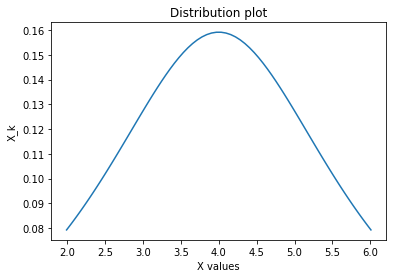

In [2]:
"""
Plot (prior) probability densities.
"""
import math
a= 4
b= 2
def P(x,a,b):
    px_given_a_b = b/(math.pi*(b**2+(x-a)**2))
    return px_given_a_b
Btheta = np.linspace(-math.pi/2,math.pi/2,num=100)
x_k_list = []
x_list = []
for theta in Btheta:
    x = b*math.atan(theta)+a
    x_k = P(x,a,b)
    x_k_list.append(x_k)
    x_list.append(x)
plt.plot(x_list,x_k_list)
plt.xlabel("X values")
plt.ylabel("X_k")
plt.title("Distribution plot")
plt.show()

Inferring the position of the lighthouse corresponds to estimating $\alpha$ and $\beta$ from the data $\mathcal{D}$. This is still quite difficult, but if we assume that $\beta$ is known, then from Bayes' theorem we know that $p(\alpha | \mathcal{D},\beta) \propto p(\mathcal{D}|\alpha,\beta) \,p(\alpha | \beta)$. We have no a priori knowledge about the position $\alpha$ along the coast other than that it should not depend on the distance out at sea.

3. Show that with these assumptions the log of the posterior density can be written as
$$
L = \ln\left(p(\alpha | \mathcal{D},\beta)\right) = constant - \sum_{k=1}^N \ln \left[ \beta^2 + (x_k - \alpha)^2 \right] 
$$
and derive the constraint on $\alpha$ that the posterior maximum needs to satisfy. Note that the estimate $\hat{\alpha}$ that maximizes the posterior (MAP) does not have an explicit expression in general! Compare the MAP with the maximum likelihood (ML) estimate for $\alpha$. 

$p(\alpha | \mathcal{D},\beta) \propto p(\mathcal{D}|\alpha,\beta) \,p(\alpha | \beta)$

---

$$p(\alpha|\beta) = p(\alpha) = \frac{1}{\text{lenght of coast}} $$

$$p(\mathcal{D}|\alpha,\beta) = \prod^N_{k=1} p(x_k|\alpha,\beta)$$ 

Posterior:

$$p(\alpha | \mathcal{D},\beta) \propto p(\alpha) \prod^N_{k=1} p(x_k|\alpha,\beta)$$

---

Log-posterior: 

$$ln(p(\alpha | \mathcal{D},\beta)) \propto ln(p(\alpha) \prod^N_{k=1} p(x_k|\alpha,\beta))$$

$$ = ln(p(\alpha)) + \sum^{N}_{k=1} ln (p(x_k|\alpha,\beta))$$

$$ = \text{constant} + \sum^{N}_{k=1} ln (\frac{\beta}{\pi [\beta^2 + (x_k - \alpha)^2]}) $$

$$ = \text{constant} + \sum^{N}_{k=1} ln (\beta) - ln ([\beta^2 + (x_k - \alpha)^2]) - ln (\pi) $$

$$ = \text{constant} + \sum^{N}_{k=1} - ln ([\beta^2 + (x_k - \alpha)^2])$$

$$ = \text{constant} - \sum^{N}_{k=1} ln ([\beta^2 + (x_k - \alpha)^2])$$


Suppose we have a data set (in km) of $\mathcal{D} = \{ 3.6, 7.7, -2.6, 4.9, -2.3, 0.2, -7.3, 4.4, 7.3, -5.7 \}$. We also assume that the distance $\beta$ from the shore is known to be 2 km. As it is difficult to find a simple expression for the value of $\hat{\alpha}$ that maximizes L, we try an alternative approach instead.

4. Create a function that returns the posterior and log-posterior and plot $p(\alpha | \mathcal{D},\beta = 2)$ as a function of $\alpha$ over the interval $[-10, 10]$. 

In [3]:
def posteriors(alphas, beta, data):
    """
    Compute the posterior and log-posterior in the same function.
    
    Parameters
    ----------
    alphas : array
        The array containing the possible positions of the lighthouse.
    beta : numeric
        The distance from the shore.
    data : array
        The array of positions of the flashes recorded.

    Returns
    -------
    array
        Posterior value.
    array
        Log-posterior value.
    """
    log_posterior = []
    posterior = []
    product_p_xk = 1
    for i,a in enumerate(alphas):
        log_posterior.append(-1*(sum(np.log(beta**2 + (data - a)**2))))
    posterior = np.exp(log_posterior)
    return ([posterior], [log_posterior])  


In [4]:
"""
Test for the posteriors function.
"""
posterior, log_posterior = posteriors(np.linspace(0, 1, 1), 0, np.array([1, 1, 1, 1, 1]))
np.testing.assert_array_almost_equal(posterior, np.array([[1]]), decimal = 2)
np.testing.assert_array_almost_equal(log_posterior, np.array([[0]]), decimal = 2)

Now plot $p(\alpha | \mathcal{D},\beta = 2)$ as a function of $\alpha$ over the interval $[-10, 10]$ with the help of `posteriors`.

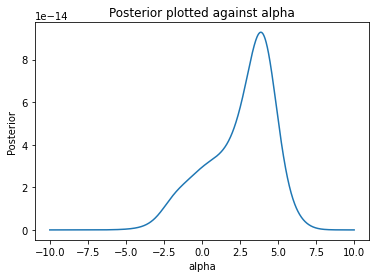

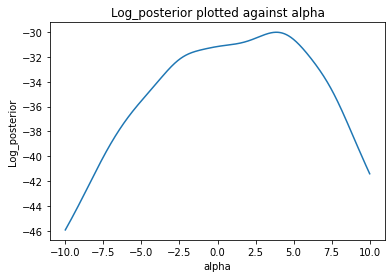

best alpha based on plot: [3.87387387]
mean alpha based on data: 1.0200000000000002


In [5]:
"""
Plot posterior densities.
"""
D = np.array([3.6,7.7,-2.6,4.9,-2.3,0.2,-7.3,4.4,7.3,-5.7]) 
alphas = np.linspace(-10,10,1000)
Pa, logPa = posteriors(alphas=alphas, beta=2, data=D)

plt.plot(alphas,Pa[-1],label='posterior')
plt.title("Posterior plotted against alpha")
plt.xlabel("alpha")
plt.ylabel("Posterior")
plt.show()

plt.plot(alphas, logPa[0])
plt.title("Log_posterior plotted against alpha")
plt.xlabel("alpha")
plt.ylabel("Log_posterior")
plt.show()

print('best alpha based on plot:',alphas[Pa[-1] == max(Pa[-1])])
print('mean alpha based on data:',np.mean(D))


What is your most likely estimate for $\hat{\alpha}$ based on this graph? Compare with the mean estimate of the dataset.

The most likely estimate of alpha is 3.87, while the mean estimate of the dataset is 1.02.
Although, looking at the graph 1.02 is not unlikely either.

### Part 2: Generate the lighthouse data
We will try to solve the original problem by letting Python find the lighthouse for us. For that we first need a data set.
1. Sample a random position $(\alpha_t, \beta_t)$ from a uniform distribution over an interval of $10$ km along the coast and between $2$ and $4$ km out to sea.

In [68]:
"""
Sample (unknown) position

Parameters
----------
a_t : array
    Random position first coordinate.
b_t : array
    Random position second coordinate.
"""
a_t = np.random.uniform(0,10, 1)
b_t = np.random.uniform(2,4, 1)

In [7]:
"""
Test shape and type of position.
"""
assert a_t.shape == (1,)
assert type(a_t) is np.ndarray

assert b_t.shape == (1,)
assert type(b_t) is np.ndarray

2. From this position generate a data set $\mathcal{D} = \{x_1,\ldots,x_N\}$ of 500 flashes in random directions that have been registered by a detector at point $x_i$ along the coast. Assume that the flashes are i.i.d. according to \eqref{pdftheta}.
Generate flashes in random direction from uniform $\theta \in [-\frac{\pi}{2}, +\frac{\pi}{2}]$, and transform to positions on the coast using the tan-equation \eqref{anglepos}.

In [8]:
"""
Generate random flashes.

Parameters
----------
X1 : array
    The array containing the random flashes.
"""
N=500
Btheta = np.random.uniform(-math.pi/2,math.pi/2,N)
X1 = np.empty(N)
for i, theta in enumerate(Btheta):
    X1[i] = b*math.atan(theta)+a

In [9]:
"""
Test for the random flashes.
"""
assert X1.shape == (500,)
assert type(X1) is np.ndarray

3. Make a plot of the mean of the data set as a function of the number of points.

a = 4
/opt/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/venv/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


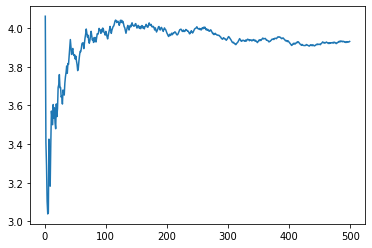

In [10]:
"""
Plot mean of data set.
"""
mean_data_array = []
nr_of_points = range(0,N)
for i in nr_of_points:
    mean_data = np.mean(X1[0:i])
    mean_data_array.append(mean_data)
plt.plot(nr_of_points, mean_data_array)
print('a =', a)

Compare the mean with the true position of the lighthouse $\alpha_t$. Consider the fact that $\alpha_t$ follows a [Cauchy distribution](https://en.wikipedia.org/wiki/Cauchy_distribution). What is the expected value of the Cauchy distribution? How many points do you expect to need to obtain a reasonable estimate of $\alpha_t$ from the mean? 

The lighthouse is at position 4.
The plot stabalizes around 4 when the nr of points increases.

When taking the mean of a Cauchy distribution when having a lot of samples, the distribution will not converge. 


### Part 3: Find the lighthouse
From the analysis in the first part we know that trying to find a maximum likelihood estimate in the usual way is possible (compute gradient, set equal to zero and solve), but that this does not result in a 'nice' closed-form expression for the solution, even when one of the parameters is assumed to be known. As we want to find estimates of both $\alpha$ and $\beta$ from the data, we will try a different approach instead.

1. Use \eqref{pdfx} to get an expression for the log-likelihood of the data $\mathcal{D}$ as a function of $\alpha$ and $\beta$.

$$p(X|\alpha,\beta) = \prod^{}_{k} p(x_k|\alpha,\beta)$$
$$ = \prod^{}_{k} \frac{\beta}{\pi \beta^2 + (x_k - \alpha)^2 }$$

$$\ln(p(X|\alpha,\beta)) = \sum^{}_{k} \ln (\frac{\beta}{\pi \beta^2 + (x_k - \alpha)^2 })$$

We can see how this likelihood (as a function of $\alpha$ and $\beta$) changes, as data points come in.

2. Process your data set $\mathcal{D}$ one by one and make a plot of the (log)likelihood after one, two, three, and 20 points have arrived, respectively.

Create a function that calculates the (log)likelihood at a specific point $(\alpha, \beta)$ after the first $k$ data points $\{x_1,\ldots,x_k\}$ have come in. Use this with the `np.mgrid` and `ax.plot_surface` functions to make plots over the interval $[-10 \leq \alpha \leq +10] \times [0 \leq \beta \leq 5]$.

In [11]:
def lighthouse_log_likelihood(a, b, X):
    """
    Log-likelihood at a specific point for first k data points.
    
    Parameters
    ----------
    a : array
        The array containing the possible positions of the lighthouse.
    b : numeric
        The distance from the shore.
    X : array
        The array of positions of the flashes recorded.

    Returns
    -------
    array
        Log-likelihood value.
    """
    log_like = np.zeros(a.shape)
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            log_like[i,j] = sum(np.log(b[i,j] / (math.pi*b[i,j]**2 + (X-a[i,j])**2) ))

    return log_like

In [12]:
"""
Tests for lighthouse_log_likelihood.
"""
a, b = np.mgrid[0.1:1.1:0.5, 0.1:1.1:0.5]
np.testing.assert_array_almost_equal(lighthouse_log_likelihood(a, b, np.array([np.tan(-np.pi/2),np.tan(np.pi/2)])),
                      np.array([[-153.93259496, -150.34907602], [-153.93259496, -150.34907602]]), decimal = 2)

Define the interval $[-10 \leq \alpha \leq +10] \times [0 \leq \beta \leq 5]$ with the help of `np.mgrid`.

In [13]:
"""
Define the intervals.

Parameters
----------
A : array
    The interval [-10, 10].
B : array
    The interval [0, 5].
"""
A = np.linspace(-10,10,21)
B = np.linspace(0,5,21)

In [14]:
"""
Test if A and B have the correct format.
"""
assert type(A) is np.ndarray
assert type(B) is np.ndarray

Make plots over the interval with `ax.plot_surface`.

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
/opt/venv/lib/python3.7/site-packages/mpl_toolkits/mplot3d/axes3d.py:1703: RuntimeWarning: invalid value encountered in subtract
  v1 = polygons[..., i1, :] - polygons[..., i2, :]
/opt/venv/lib/python3.7/site-packages/numpy/core/numeric.py:1627: RuntimeWarning: invalid value encountered in multiply
  multiply(a1, b2, out=cp0)
/opt/venv/lib/python3.7/site-packages/mpl_toolkits/mplot3d/proj3d.py:109: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


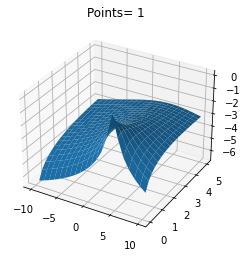

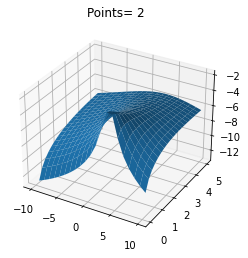

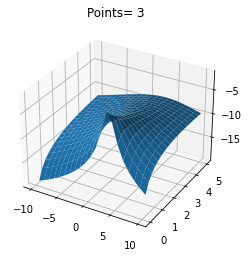

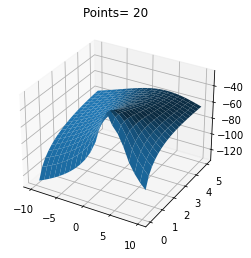

In [15]:
"""
Plot 2D-likelihood as a function of the number of points.
"""

A_grid,B_grid = np.meshgrid(A,B)
N_Points = [1,2,3,20]
for point in N_Points:
    likelihood_result = lighthouse_log_likelihood(A_grid, B_grid, X1[:point])

    ax = plt.axes(projection ='3d') 
    ax.plot_surface(A_grid, B_grid, np.array(likelihood_result))
    plt.title("Points= "+str(point))
    plt.show()


What happens to the (log-)likelihood surface as each batch of data points arrives?

More points will lead to a better approximation of the maximum.

We can make a reasonable (visual) estimate of the most probable position of the lighthouse from the graph, after a few data points have been observed. However, as we are working on a computer, we can let Python do the dirty work for us.

3. Create a function that uses `scipy.optimize.fmin` to compute the values of $\alpha$ and $\beta$ that maximise the likelihood for a data set of $k$ points, and plot these as a function of the number of points. Use $[0,1]$ as the initial starting value for `scipy.optimize.fmin`.

In [61]:
def f_to_optimize_params(p, X):
    a,b = p
    return -sum(np.log(b / (math.pi*b**2 + (X-a)**2) ))

def ml_estimate(X, disp_value=True):
    """
    ML estimate of the lighthouse position as a function of the number of points.
    
    Parameters
    ----------
    X : array
        The array of positions of the flashes recorded.
    disp_value: boolean value
        Set to True to print convergence messages.

    Returns
    -------
    array
        The result of fmin for each flash point.
    """
    return scipy.optimize.fmin(func = f_to_optimize_params, x0=np.array([0,1]), args=(X,),maxiter=4000, xtol=0.0001, disp=disp_value) 
ml_estimate(X1)


Optimization terminated successfully.
         Current function value: 737.594129
         Iterations: 73
         Function evaluations: 137
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


array([3.78201644, 0.61767433])

In [58]:
"""
Tests for ml_estimate.
"""

'\nTests for ml_estimate.\n'

Now plot these as a function of the number of points.

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/venv/lib/python3.7/site-packages/scipy/optimize/optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


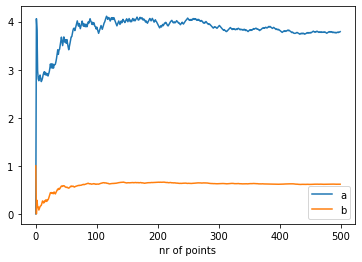

In [62]:
"""
Plot position estimates.
"""
a_s = []
b_s = []
for i in range(len(X1)):
    a,b = ml_estimate(X1[:i], disp_value = False)
    a_s.append(a)
    b_s.append(b)
plt.plot(range(len(X1)),a_s, label='a')
plt.plot(range(len(X1)),b_s, label='b')
plt.xlabel('nr of points')
plt.legend()
plt.show()

Compare your final estimate with the true values $(\alpha_t, \beta_t)$.

The final estimates are $\alpha_t = 3.78201644$ and $\beta_t = 0.61767433$. The true values are $4$ and $2$, respectively. 
The value of $\alpha_t$ is closer to the true value than the value of $\beta_t$ to it's true value.